In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

RandomState(MT19937)
[[-6.25301618e-01 -1.70063657e-01]
 [ 9.60695033e-01  5.90900597e-01]
 [-5.98543385e-01 -4.02593393e-01]
 [-2.22805938e+00 -5.32576740e-01]
 [-4.61430060e-01 -4.98867244e-01]
 [-9.58929028e-01 -2.69331024e-01]
 [-6.73079909e-01 -3.38308547e-01]
 [ 1.30501861e+00  5.91357846e-01]
 [ 3.74545597e-01 -9.85442049e-02]
 [-1.82628627e+00 -4.06170254e-01]
 [ 6.68262284e-01  3.36877396e-01]
 [-5.82646676e-01 -1.77369217e-01]
 [-4.18128976e-01 -3.73811389e-01]
 [ 1.72209371e-01  2.64668836e-01]
 [ 3.77116687e-01  1.88442969e-01]
 [-6.79396230e-01 -1.31601978e-01]
 [ 1.03148960e+00  4.25550018e-01]
 [ 3.36041799e-01  3.90982721e-02]
 [ 7.05745985e-01  4.88730649e-01]
 [ 8.39511547e-01  1.52125872e-01]
 [ 1.49882898e+00  4.71380809e-01]
 [ 2.88356638e-01  3.31334714e-02]
 [-5.02935011e-01 -3.68665426e-01]
 [ 1.47921067e+00  7.40445724e-01]
 [-4.44382429e-01 -1.65019364e-01]
 [-5.33464228e-01 -6.02221911e-02]
 [-6.16229422e-01 -2.11783922e-01]
 [ 7.46598965e-02 -6.14321077e-02]

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

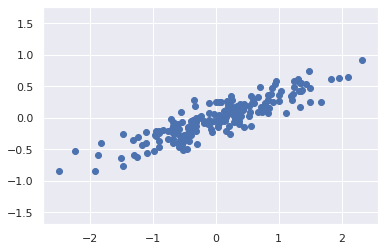

In [2]:
rng = np.random.RandomState(1)
print(rng)
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
print(x)
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


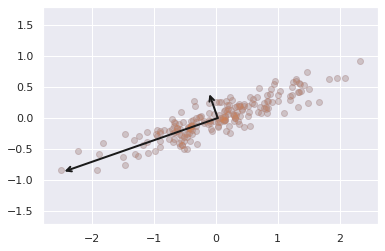

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrow = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='k')
    ax.annotate('', v1, v0, arrowprops=arrow)
    
    plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [7]:
pca = PCA(n_components=1)
pca.fit(x)
x_pca = pca.transform(x)
print(x.shape)
print(x_pca.shape)

(200, 2)
(200, 1)


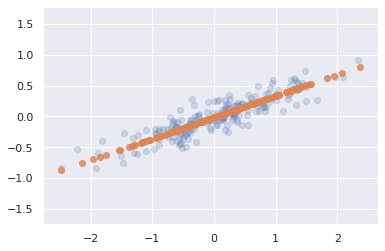

In [8]:
x_new = pca.inverse_transform(x_pca)
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], alpha=.8)
plt.axis('equal');

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [10]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


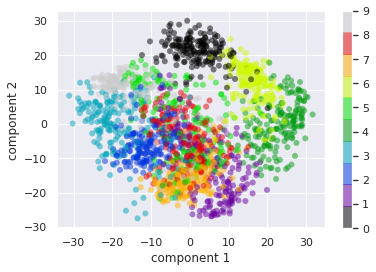

In [11]:
plt.scatter(projected[:, 0], projected[:, 1],
          c=digits.target, edgecolor='none', alpha=0.5,
          cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

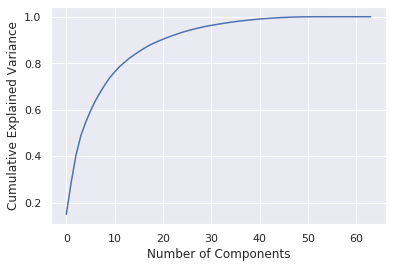

In [12]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

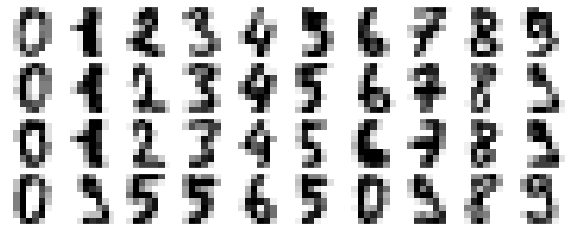

In [13]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap='binary', interpolation='nearest',
                 clim=(0, 16))
        
plot_digits(digits.data);

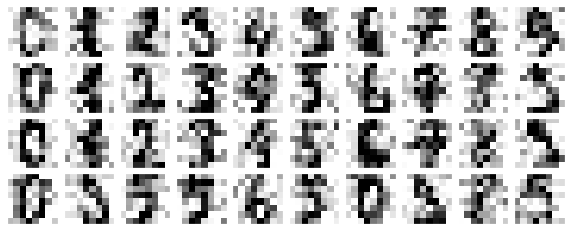

In [14]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy);

In [15]:
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

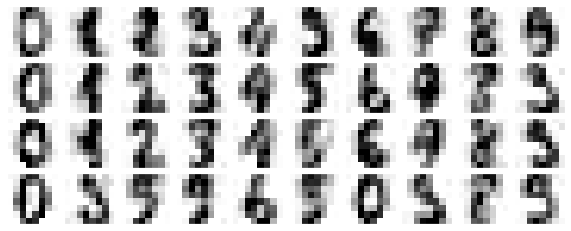

In [16]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered);

In [18]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [20]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

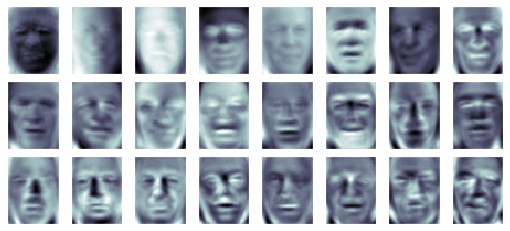

In [22]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                        subplot_kw={'xticks':[], 'yticks':[]}, 
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

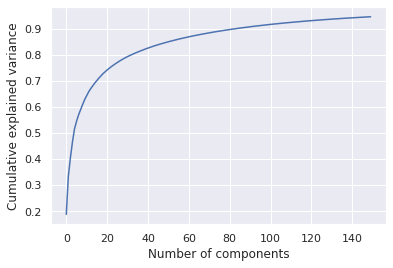

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [25]:
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

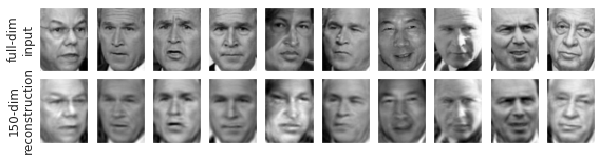

In [26]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');